In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import forestplot as fp
from matplotlib import pyplot

#df = pd.read_csv("https://raw.githubusercontent.com/cleventanweicong/mdr-systematic-review/main/data/MDR_XDR_PDR_Data%20Extraction.csv")
df = pd.read_csv(r'C:/Users/Cleven/OneDrive - National University of Singapore/NUS/Systematic Review on Resistance Definitions/data extraction/coding/FINAL/MDR_XDR_PDR_Data Extraction.csv')
df1 = df.query("included in ('1','0')")

# Randomize the articles
df1 = df1.sample(frac=1, random_state=1) 
df_inc = df1[df1['included']=='1']
df_exc = df1[df1['included']=='0']

df_inc = df_inc.fillna('NA')

# Re-categorizing 'skin and soft tissue' infection into 'others'
df_inc = df_inc.replace(['skin and soft tissue'],'others') 

# Re-categorizing 'brain and meningeal' infection into 'others'
df_inc = df_inc.replace(['brain and meningeal'],'others') 

# Re-categorizing 'surgical site infection' infection into 'others'
df_inc = df_inc.replace(['surgical site infection'],'others') 

# Re-categorizing 'intraabdominal' infection into 'GI or intraabdominal'
df_inc = df_inc.replace(['intraabdominal'],'GI or intraabdominal') 

# Re-categorizing articles with 'others' infection into 'GI or intraabdominal' infection based on keywords from comments
gastrolist = df_inc[df_inc['comment'].str.contains('GI|gastro|enteritis|Gastro|Typhoid|typhoid|typhi|Typhi|salmonella|Salmonella|Shigella|shigella|shigellosis|Shigellosis|diarrhea|Diarrhea|diarrhoea|Diarrhoea|Helicobacter|helicobacter|campylobacter|Campylobacter')]
for i in list(gastrolist.index):
    if df_inc.loc[i]['infection_type'] == 'others':
        df_inc.loc[i,'infection_type'] = 'GI or intraabdominal'
    else:
        continue

# Creating dataframe for included articles only
df_inc = df_inc.astype({'year': 'int64',
                        'mdr_definition': 'int64','xdr_definition': 'int64','pdr_definition': 'int64','dtr_definition': 'int64','udr_definition': 'int64',
                        'usedinmethod': 'int64','usedinresult': 'int64'})
df_exc["exclude_reason"].value_counts()


exclude_reason
terms not used              1391
review-editorial-opinion    1108
no full article found        531
not English                   44
no human implications         19
non-bacterial infection       15
Name: count, dtype: int64

In [4]:
### Summary Trend - Variable 1 (Inclusion vs Exclusion) ###

var1 = list(set(df1['included'].to_list()))
print(var1)
i = 100

# Creating dataframe for plotting proportions over number of articles screened

data1temp = []
while i < df1['included'].shape[0]:
    for v in var1:
        count = df1.iloc[:i][df1['included'] == v].shape[0]
        proportion = round((count/i*100),2)
        data1temp.append([i,v,count,proportion])
    i = i + 100

for v in var1:
    count = df1[df1['included'] == v].shape[0]
    proportion = round((count/df1.shape[0]*100),2)
    data1temp.append([df1.shape[0],v,count,proportion])
data1temp = pd.DataFrame(data1temp,columns=['Number of articles','Variable','Count','Proportion'])
data1temp['Variable'] = data1temp['Variable'].replace({"0": "Excluded", "1": "Included"})

# Pivot long to wide data for proportions
data1=data1temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data1

['0', '1']


Variable,Excluded,Included
Number of articles,,
100,58.00,42.00
200,57.50,42.50
300,57.00,43.00
400,57.25,42.75
500,56.60,43.40
600,57.50,42.50
700,58.43,41.57
800,59.13,40.88
900,58.78,41.22


In [5]:
### Summary Trend - Variable 2 (Exclusion Reasons) ###

i=100
var2 = list(set(df_exc['exclude_reason'].to_list()))
print(var2)

# Creating dataframe for plotting proportions over number of articles screened

data2temp=[]
while i < df_exc['exclude_reason'].shape[0]:
    for v in var2:
        count = df_exc.iloc[:i][df_exc['exclude_reason'] == v].shape[0]
        proportion = round((count/i*100),2)
        data2temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var2:
    count = df_exc[df_exc['exclude_reason'] == v].shape[0]
    proportion = round((count/df_exc.shape[0]*100),2)
    data2temp.append([df_exc['exclude_reason'].shape[0],str.capitalize(v),count,proportion])
data2temp = pd.DataFrame(data2temp,columns=['Number of articles','Variable','Count','Proportion'])

#Pivot long to wide data for proportions
data2=data2temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data2.rename(columns = {'No human implications':'No relevance to human health','Review-editorial-opinion':'Review/editorials/commentaries',
                       'Non-bacterial infection':'Virus/fungus/TB/parasites','Not english':'Not in English',
                        'Terms not used':'Drug resistance terms not included in methods or results sections'}, inplace = True)


['non-bacterial infection', 'no full article found', 'not English', 'no human implications', 'review-editorial-opinion', 'terms not used']


In [6]:
### Summary Trend - Variable 3 (Study Types) ###

i=100
var3 = list(set(df_inc['study_type'].to_list()))
print(var3)

# Creating dataframe for plotting proportions over number of articles screened

data3temp=[]
while i < df_inc['study_type'].shape[0]:
    for v in var3:
        count = df_inc.iloc[:i][df_inc['study_type'] == v].shape[0]
        proportion = round((count/i*100),2)
        data3temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var3:
    count = df_inc[df_inc['study_type'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data3temp.append([df_inc['study_type'].shape[0],str.capitalize(v),count,proportion])
data3temp = pd.DataFrame(data3temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data3=data3temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data3.rename(columns = {'In vitro experiment':'$\it{in}$ $\it{vitro}$ Experiment', 
                        'Systematic review/metaanalysis':'Systematic review/meta-analysis'}, inplace = True)

['observational', 'in vitro experiment', 'systematic review/metaanalysis', 'interventional']


In [10]:
### Summary Trend - Variable 4 (Study Populations) ###

#Combining unknown and NA into single category "Not specified"

df_inc['study_population'] = df_inc['study_population'].replace(['NA'],'unknown')

i=100
var4 = list(set(df_inc['study_population'].to_list()))
print(var4)

# Creating dataframe for plotting proportions over number of articles screened

data4temp=[]
while i < df_inc['study_population'].shape[0]:
    for v in var4:
        count = df_inc.iloc[:i][df_inc['study_population'] == v].shape[0]
        proportion = round((count/i*100),2)
        data4temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var4:
    count = df_inc[df_inc['study_population'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data4temp.append([df_inc['study_population'].shape[0],str.capitalize(v),count,proportion])
data4temp = pd.DataFrame(data4temp,columns=['Number of articles','Variable','Count','Proportion'])
data4temp['Variable'] = data4temp['Variable'].replace(['Unknown'],'Not specified')

# Pivot long to wide data for proportions

data4=data4temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data4.rename(columns = {'Animal-envir':'Animal-Environment','Human-animal-envir':'Human-animal-environment',
                       'Human-envir':'Human-environment'}, inplace = True)


['human', 'unknown', 'environment', 'human-animal', 'human-envir', 'human-animal-envir', 'animal', 'animal-envir']


In [7]:
### Summary Trend - Variable 5 (Drug Resistance Terms) ###
i=100

# Creating dataframe for plotting proportions over number of articles screened

data5temp=[]
while i < df_inc['mdr_definition'].shape[0]:
    countm = df_inc.iloc[:i][df_inc['mdr_definition'] == 1].shape[0]
    tempproportionm = round((countm/i*100),2)

    countx = df_inc.iloc[:i][df_inc['xdr_definition'] == 1].shape[0]
    tempproportionx = round((countx/i*100),2)

    countp = df_inc.iloc[:i][df_inc['pdr_definition'] == 1].shape[0]
    tempproportionp = round((countp/i*100),2)

    countd = df_inc.iloc[:i][df_inc['dtr_definition'] == 1].shape[0]
    tempproportiond = round((countd/i*100),2)

    countu = df_inc.iloc[:i][df_inc['udr_definition'] == 1].shape[0]
    tempproportionu = round((countu/i*100),2)

    totalproportion = tempproportionm + tempproportionx + tempproportionp + tempproportiond + tempproportionu

    proportionm = round(tempproportionm/totalproportion*100,2)
    proportionx = round(tempproportionx/totalproportion*100,2)
    proportionp = round(tempproportionp/totalproportion*100,2)
    proportiond = round(tempproportiond/totalproportion*100,2)
    proportionu = round(tempproportionu/totalproportion*100,2)
    data5temp.append([i,'MDR',countm,proportionm])
    data5temp.append([i,'XDR',countx,proportionx])
    data5temp.append([i,'PDR',countp,proportionp])
    data5temp.append([i,'DTR',countd,proportiond])
    data5temp.append([i,'UDR',count,proportionu])
    i = i + 100
    
countm = df_inc[df_inc['mdr_definition'] == 1].shape[0]
tempproportionm = round((countm/df_inc.shape[0]*100),2)
    
countx = df_inc[df_inc['xdr_definition'] == 1].shape[0]
tempproportionx = round((countx/df_inc.shape[0]*100),2)
    
countp = df_inc[df_inc['pdr_definition'] == 1].shape[0]
tempproportionp = round((countp/df_inc.shape[0]*100),2)
    
countd = df_inc[df_inc['dtr_definition'] == 1].shape[0]
tempproportiond = round((countd/df_inc.shape[0]*100),2)
    
countu = df_inc[df_inc['udr_definition'] == 1].shape[0]
tempproportionu = round((countu/df_inc.shape[0]*100),2)
totalproportion = tempproportionm + tempproportionx + tempproportionp + tempproportiond + tempproportionu
proportionm = round(tempproportionm/totalproportion*100,2)
proportionx = round(tempproportionx/totalproportion*100,2)
proportionp = round(tempproportionp/totalproportion*100,2)
proportiond = round(tempproportiond/totalproportion*100,2)
proportionu = round(tempproportionu/totalproportion*100,2)
data5temp.append([df_inc['mdr_definition'].shape[0],'MDR',countm,proportionm])
data5temp.append([df_inc['xdr_definition'].shape[0],'XDR',countx,proportionx])
data5temp.append([df_inc['pdr_definition'].shape[0],'PDR',countp,proportionp])
data5temp.append([df_inc['dtr_definition'].shape[0],'DTR',countd,proportiond])
data5temp.append([df_inc['udr_definition'].shape[0],'UDR',count,proportionu])
data5temp = pd.DataFrame(data5temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data5=data5temp.pivot(index='Number of articles',columns='Variable')['Proportion']


In [9]:
### Summary Trend - Variable 6 (Drug Resistance Definition and Citation) ###

i=100
var6 = list(set(df_inc['cite_definition'].to_list()))
print(var6)

# Creating dataframe for plotting proportions over number of articles screened

data6temp=[]
while i < df_inc['cite_definition'].shape[0]:
    for v in var6:
        count = df_inc.iloc[:i][df_inc['cite_definition'] == v].shape[0]
        proportion = round((count/i*100),2)
        data6temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var6:
    count = df_inc[df_inc['cite_definition'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data6temp.append([df_inc['cite_definition'].shape[0],str.capitalize(v),count,proportion])
data6temp = pd.DataFrame(data6temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data6=data6temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data6.rename(columns = {'Cited magiorakos 2011':'Magiorakos 2011 definition (cited)',
                        'Not cited but same definition':'Magiorakos 2011 definition (not cited)',
                        'Not cited different definition':'Other definitions',
                        'Not cited without clear definition':'No clear definitions'}, inplace = True)
data6

['not cited without clear definition', 'not cited different definition', 'not cited but same definition', 'cited Magiorakos 2011']


Variable,Magiorakos 2011 definition (cited),Magiorakos 2011 definition (not cited),Other definitions,No clear definitions
Number of articles,,,,
100,32.00,18.00,9.00,41.00
200,34.50,18.00,10.50,37.00
300,34.00,19.67,9.33,37.00
400,32.75,21.00,9.25,37.00
500,33.20,21.00,9.60,36.20
600,34.50,21.00,8.83,35.67
700,34.57,22.86,8.43,34.14
800,34.50,22.25,8.62,34.62
900,35.00,22.67,8.56,33.78


In [11]:
### Summary Trend - Variable 7 (Sections with Drug Resistance Terms) ###

# Melting data from wide format to long format 

section = []
for x in list(zip(df_inc['usedinmethod'],df_inc['usedinresult'])):
    if x == (1,0):
        section.append('methods only')
    elif x == (0,1):
        section.append('results only')
    else:
        section.append('methods & results')
df_inc['section'] = section

# Creating dataframe for plotting proportions over number of articles screened

i=100
var7 = list(set(df_inc['section'].to_list()))
data7temp=[]
while i < df_inc['section'].shape[0]:
    for v in var7:
        count = df_inc.iloc[:i][df_inc['section'] == v].shape[0]
        proportion = round((count/i*100),2)
        data7temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var7:
    count = df_inc[df_inc['section'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data7temp.append([df_inc['section'].shape[0],str.capitalize(v),count,proportion])
data7temp = pd.DataFrame(data7temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data7=data7temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data7

Variable,Methods & results,Methods only,Results only
Number of articles,,,
100,56.00,10.00,34.00
200,57.00,9.50,33.50
300,57.33,9.67,33.00
400,57.50,9.25,33.25
500,58.40,9.00,32.60
600,59.17,8.00,32.83
700,59.43,8.14,32.43
800,59.13,8.25,32.62
900,59.67,8.11,32.22


In [12]:
### Summary Trend - Variable 8 (Sample Sites) ###

# Dropping missing data and removing 'NA' category - 'NA' refers to isolates obtained from environment

df_inc_site = df_inc[(df_inc['sample_site'] != 'NA') & (df_inc['sample_site'] != 'missing')]
i=100
var8 = list(set(df_inc_site['sample_site'].to_list()))
print(var8)

# Creating dataframe for plotting proportions over number of articles screened

data8temp=[]
while i < df_inc_site.shape[0]:
    for v in var8:
        count = df_inc_site.iloc[:i][df_inc_site['sample_site'] == v].shape[0]
        proportion = round((count/i*100),2)
        data8temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
    
for v in var8:
    count = df_inc_site[df_inc_site['sample_site'] == v].shape[0]
    proportion = round((count/df_inc_site.shape[0]*100),2)
    data8temp.append([df_inc_site.shape[0],str.capitalize(v),count,proportion])
data8temp = pd.DataFrame(data8temp,columns=['Number of articles','Variable','Count','Proportion'])
data8temp['Variable'] = data8temp['Variable'].replace(['Both'],'Clinical & screening')

# Pivot long to wide data for proportions

data8=data8temp.pivot(index='Number of articles',columns='Variable')['Proportion']


['clinical', 'screening (colonisation)', 'both', 'missing ']


In [13]:
### Summary Trend - Variable 9 (Infection Types) ### 

# Dropping missing data and removing 'NA' category - 'NA' refers to isolates obtained from screening (colonisation)

df_inc_inf = df_inc[(df_inc['infection_type'] != 'NA') & (df_inc['infection_type'] != 'missing')] 
df_inc_inf['infection_type'] = df_inc_inf['infection_type'].replace(['combination'],'others') #combining combination and others into single category "Other infections"

i=100
var9 = list(set(df_inc_inf['infection_type'].to_list()))
print(var9)

# Creating dataframe for plotting proportions over number of articles screened

data9temp=[]
while i < df_inc_inf['infection_type'].shape[0]:
    for v in var9:
        count = df_inc_inf.iloc[:i][df_inc_inf['infection_type'] == v].shape[0]
        proportion = round((count/i*100),2)
        data9temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var9:
    count = df_inc_inf[df_inc_inf['infection_type'] == v].shape[0]
    proportion = round((count/df_inc_inf.shape[0]*100),2)
    data9temp.append([df_inc_inf['infection_type'].shape[0],str.capitalize(v),count,proportion])
data9temp = pd.DataFrame(data9temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data9=data9temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data9.rename(columns = {'Respiratory':'Respiratory tract',
                        'Gi or intraabdominal':'Gastrointestinal tract',
                        'Urinary':'Urinary tract','Others':'Other infection source'}, inplace = True)


['others', 'urinary', 'bloodstream', 'respiratory', 'GI or intraabdominal']


In [14]:
### Summary Trend - Variable 10 (Drug Resistance Typing Methods) ###

# Melting data from wide format to long format

typing = []
for x in list(zip(df_inc['genotype_resistance'],df_inc['phenotype_resistance'])):
    if x == (1,0):
        typing.append('genotype only')
    elif x == (0,1):
        typing.append('phenotype only')
    elif x == (1,1):
        typing.append('genotype & phenotype')
    else:
        typing.append('no typing done')
df_inc['typing'] = typing

i=100
var10 = list(set(df_inc['typing'].to_list()))

# Creating dataframe for plotting proportions over number of articles screened

data10temp=[]
while i < df_inc['typing'].shape[0]:
    for v in var10:
        count = df_inc.iloc[:i][df_inc['typing'] == v].shape[0]
        proportion = round((count/i*100),2)
        data10temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var10:
    count = df_inc[df_inc['typing'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data10temp.append([df_inc['typing'].shape[0],str.capitalize(v),count,proportion])
data10temp = pd.DataFrame(data10temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data10=data10temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data10.rename(columns = {'No typing done':'Not specified'})


Variable,Genotype & phenotype,Genotype only,Not specified,Phenotype only
Number of articles,,,,
100,35.00,6.00,10.00,49.00
200,38.00,5.00,10.50,46.50
300,37.33,3.33,12.33,47.00
400,37.00,3.75,10.75,48.50
500,37.80,3.80,11.40,47.00
600,37.00,5.00,11.83,46.17
700,36.86,4.86,11.57,46.71
800,36.00,4.62,11.50,47.88
900,36.89,4.56,11.11,47.44


In [15]:
### Summary Trend - Variable 11 (Susceptibility Guidelines) ###

# Melting data from wide format to long format

susguide = []
for x in list(zip(df_inc['eucast_susceptguide'],df_inc['clsi_susceptguide'],df_inc['others_susceptguide'])):
    if x == (1,0,0):
        susguide.append('eucast only')
    elif x == (0,1,0):
        susguide.append('clsi only')
    elif x == (1,1,0):
        susguide.append('eucast & clsi')
    elif x == (0,0,1):
        susguide.append('other guidelines')
    else:
        susguide.append('no guidelines specified')
df_inc['susguide'] = susguide

i=100
var11 = list(set(df_inc['susguide'].to_list()))
print(var11)

# Creating dataframe for plotting proportions over number of articles screened

data11temp=[]
while i < df_inc['susguide'].shape[0]:
    for v in var11:
        count = df_inc.iloc[:i][df_inc['susguide'] == v].shape[0]
        proportion = round((count/i*100),2)
        data11temp.append([i,str.capitalize(v),count,proportion])
    i = i + 100
for v in var11:
    count = df_inc[df_inc['susguide'] == v].shape[0]
    proportion = round((count/df_inc.shape[0]*100),2)
    data11temp.append([df_inc['susguide'].shape[0],str.capitalize(v),count,proportion])
data11temp = pd.DataFrame(data11temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data11=data11temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data11.rename(columns={'Clsi only': 'CLSI only','Eucast & clsi':'EUCAST & CLSI','Eucast only':'EUCAST only'}, inplace=True)


['clsi only', 'eucast only', 'other guidelines', 'eucast & clsi', 'no guidelines specified']


In [17]:
### Summary Trend - Variable 12 (Microorganisms) ###

# Creating dataframe for plotting proportions over number of articles screened

i=100
data12temp=[]
while i < df_inc['saureus_organism'].shape[0]:
    counts = df_inc.iloc[:i][df_inc['saureus_organism'] == 1].shape[0]
    tempproportions = round((counts/i*100),2)
    
    countec = df_inc.iloc[:i][df_inc['enterococcus_organism'] == 1].shape[0]
    tempproportionec = round((countec/i*100),2)
    
    counteb = df_inc.iloc[:i][df_inc['enterobacterales_organism'] == 1].shape[0]
    tempproportioneb = round((counteb/i*100),2)
    
    countp = df_inc.iloc[:i][df_inc['paeru_organism'] == 1].shape[0]
    tempproportionp = round((countp/i*100),2)
    
    countab = df_inc.iloc[:i][df_inc['abaum_organism'] == 1].shape[0]
    tempproportionab = round((countab/i*100),2)
    
    counto = df_inc.iloc[:i][df_inc['other_organism'] == 1].shape[0]
    tempproportiono = round((counto/i*100),2)
    
    #Normalising proportions
    
    totalproportion = tempproportions + tempproportionec + tempproportioneb + tempproportionp + tempproportionab + tempproportiono
    proportions = round(tempproportions/totalproportion*100,2)
    proportionec = round(tempproportionec/totalproportion*100,2)
    proportioneb = round(tempproportioneb/totalproportion*100,2)
    proportionp = round(tempproportionp/totalproportion*100,2)
    proportionab = round(tempproportionab/totalproportion*100,2)
    proportiono = round(tempproportiono/totalproportion*100,2)
    data12temp.append([i,'$\it{Staphylococcus}$ $\it{aureus}$',counts,proportions])
    data12temp.append([i,'$\it{Enterococcus}$ spp.',countec,proportionec])
    data12temp.append([i,'Enterobacterales',counteb,proportioneb])
    data12temp.append([i,'$\it{Pseudomonas}$ spp.',countp,proportionp])
    data12temp.append([i,'$\it{Acinetobacter}$ spp.',countab,proportionab])
    data12temp.append([i,'Others',counto,proportiono])
    i = i + 100
    
counts = df_inc.iloc[:i][df_inc['saureus_organism'] == 1].shape[0]
tempproportions = round((counts/df_inc.shape[0]*100),2)
    
countec = df_inc.iloc[:i][df_inc['enterococcus_organism'] == 1].shape[0]
tempproportionec = round((countec/df_inc.shape[0]*100),2)
    
counteb = df_inc.iloc[:i][df_inc['enterobacterales_organism'] == 1].shape[0]
tempproportioneb = round((counteb/df_inc.shape[0]*100),2)
    
countp = df_inc.iloc[:i][df_inc['paeru_organism'] == 1].shape[0]
tempproportionp = round((countp/df_inc.shape[0]*100),2)
    
countab = df_inc.iloc[:i][df_inc['abaum_organism'] == 1].shape[0]
tempproportionab = round((countab/df_inc.shape[0]*100),2)
    
counto = df_inc.iloc[:i][df_inc['other_organism'] == 1].shape[0]
tempproportiono = round((counto/df_inc.shape[0]*100),2)
    
totalproportion = tempproportions + tempproportionec + tempproportioneb + tempproportionp + tempproportionab + tempproportiono
proportions = round(tempproportions/totalproportion*100,2)
proportionec = round(tempproportionec/totalproportion*100,2)
proportioneb = round(tempproportioneb/totalproportion*100,2)
proportionp = round(tempproportionp/totalproportion*100,2)
proportionab = round(tempproportionab/totalproportion*100,2)
proportiono = round(tempproportiono/totalproportion*100,2)
data12temp.append([df_inc['saureus_organism'].shape[0],'$\it{Staphylococcus}$ $\it{aureus}$',counts,proportions])
data12temp.append([df_inc['enterococcus_organism'].shape[0],'$\it{Enterococcus}$ spp.',countec,proportionec])
data12temp.append([df_inc['enterobacterales_organism'].shape[0],'Enterobacterales',counteb,proportioneb])
data12temp.append([df_inc['paeru_organism'].shape[0],'$\it{Pseudomonas}$ spp.',countp,proportionp])
data12temp.append([df_inc['abaum_organism'].shape[0],'$\it{Acinetobacter}$ spp.',countab,proportionab])
data12temp.append([df_inc['other_organism'].shape[0],'Others',counto,proportiono])
data12temp = pd.DataFrame(data12temp,columns=['Number of articles','Variable','Count','Proportion'])

# Pivot long to wide data for proportions

data12=data12temp.pivot(index='Number of articles',columns='Variable')['Proportion']
data12

Variable,$\it{Acinetobacter}$ spp.,$\it{Enterococcus}$ spp.,$\it{Pseudomonas}$ spp.,$\it{Staphylococcus}$ $\it{aureus}$,Enterobacterales,Others
Number of articles,,,,,,
100,12.57,9.95,17.28,14.66,30.89,14.66
200,11.48,8.96,15.69,14.57,32.49,16.81
300,12.31,8.84,15.58,14.42,32.31,16.54
400,11.70,8.59,15.70,14.37,33.04,16.59
500,11.88,8.43,15.80,14.61,33.73,15.56
600,12.32,8.21,15.93,14.37,33.53,15.64
700,12.99,8.04,15.73,14.36,33.50,15.38
800,13.08,7.80,16.12,13.82,33.95,15.23
900,13.61,7.95,16.50,13.61,33.20,15.12


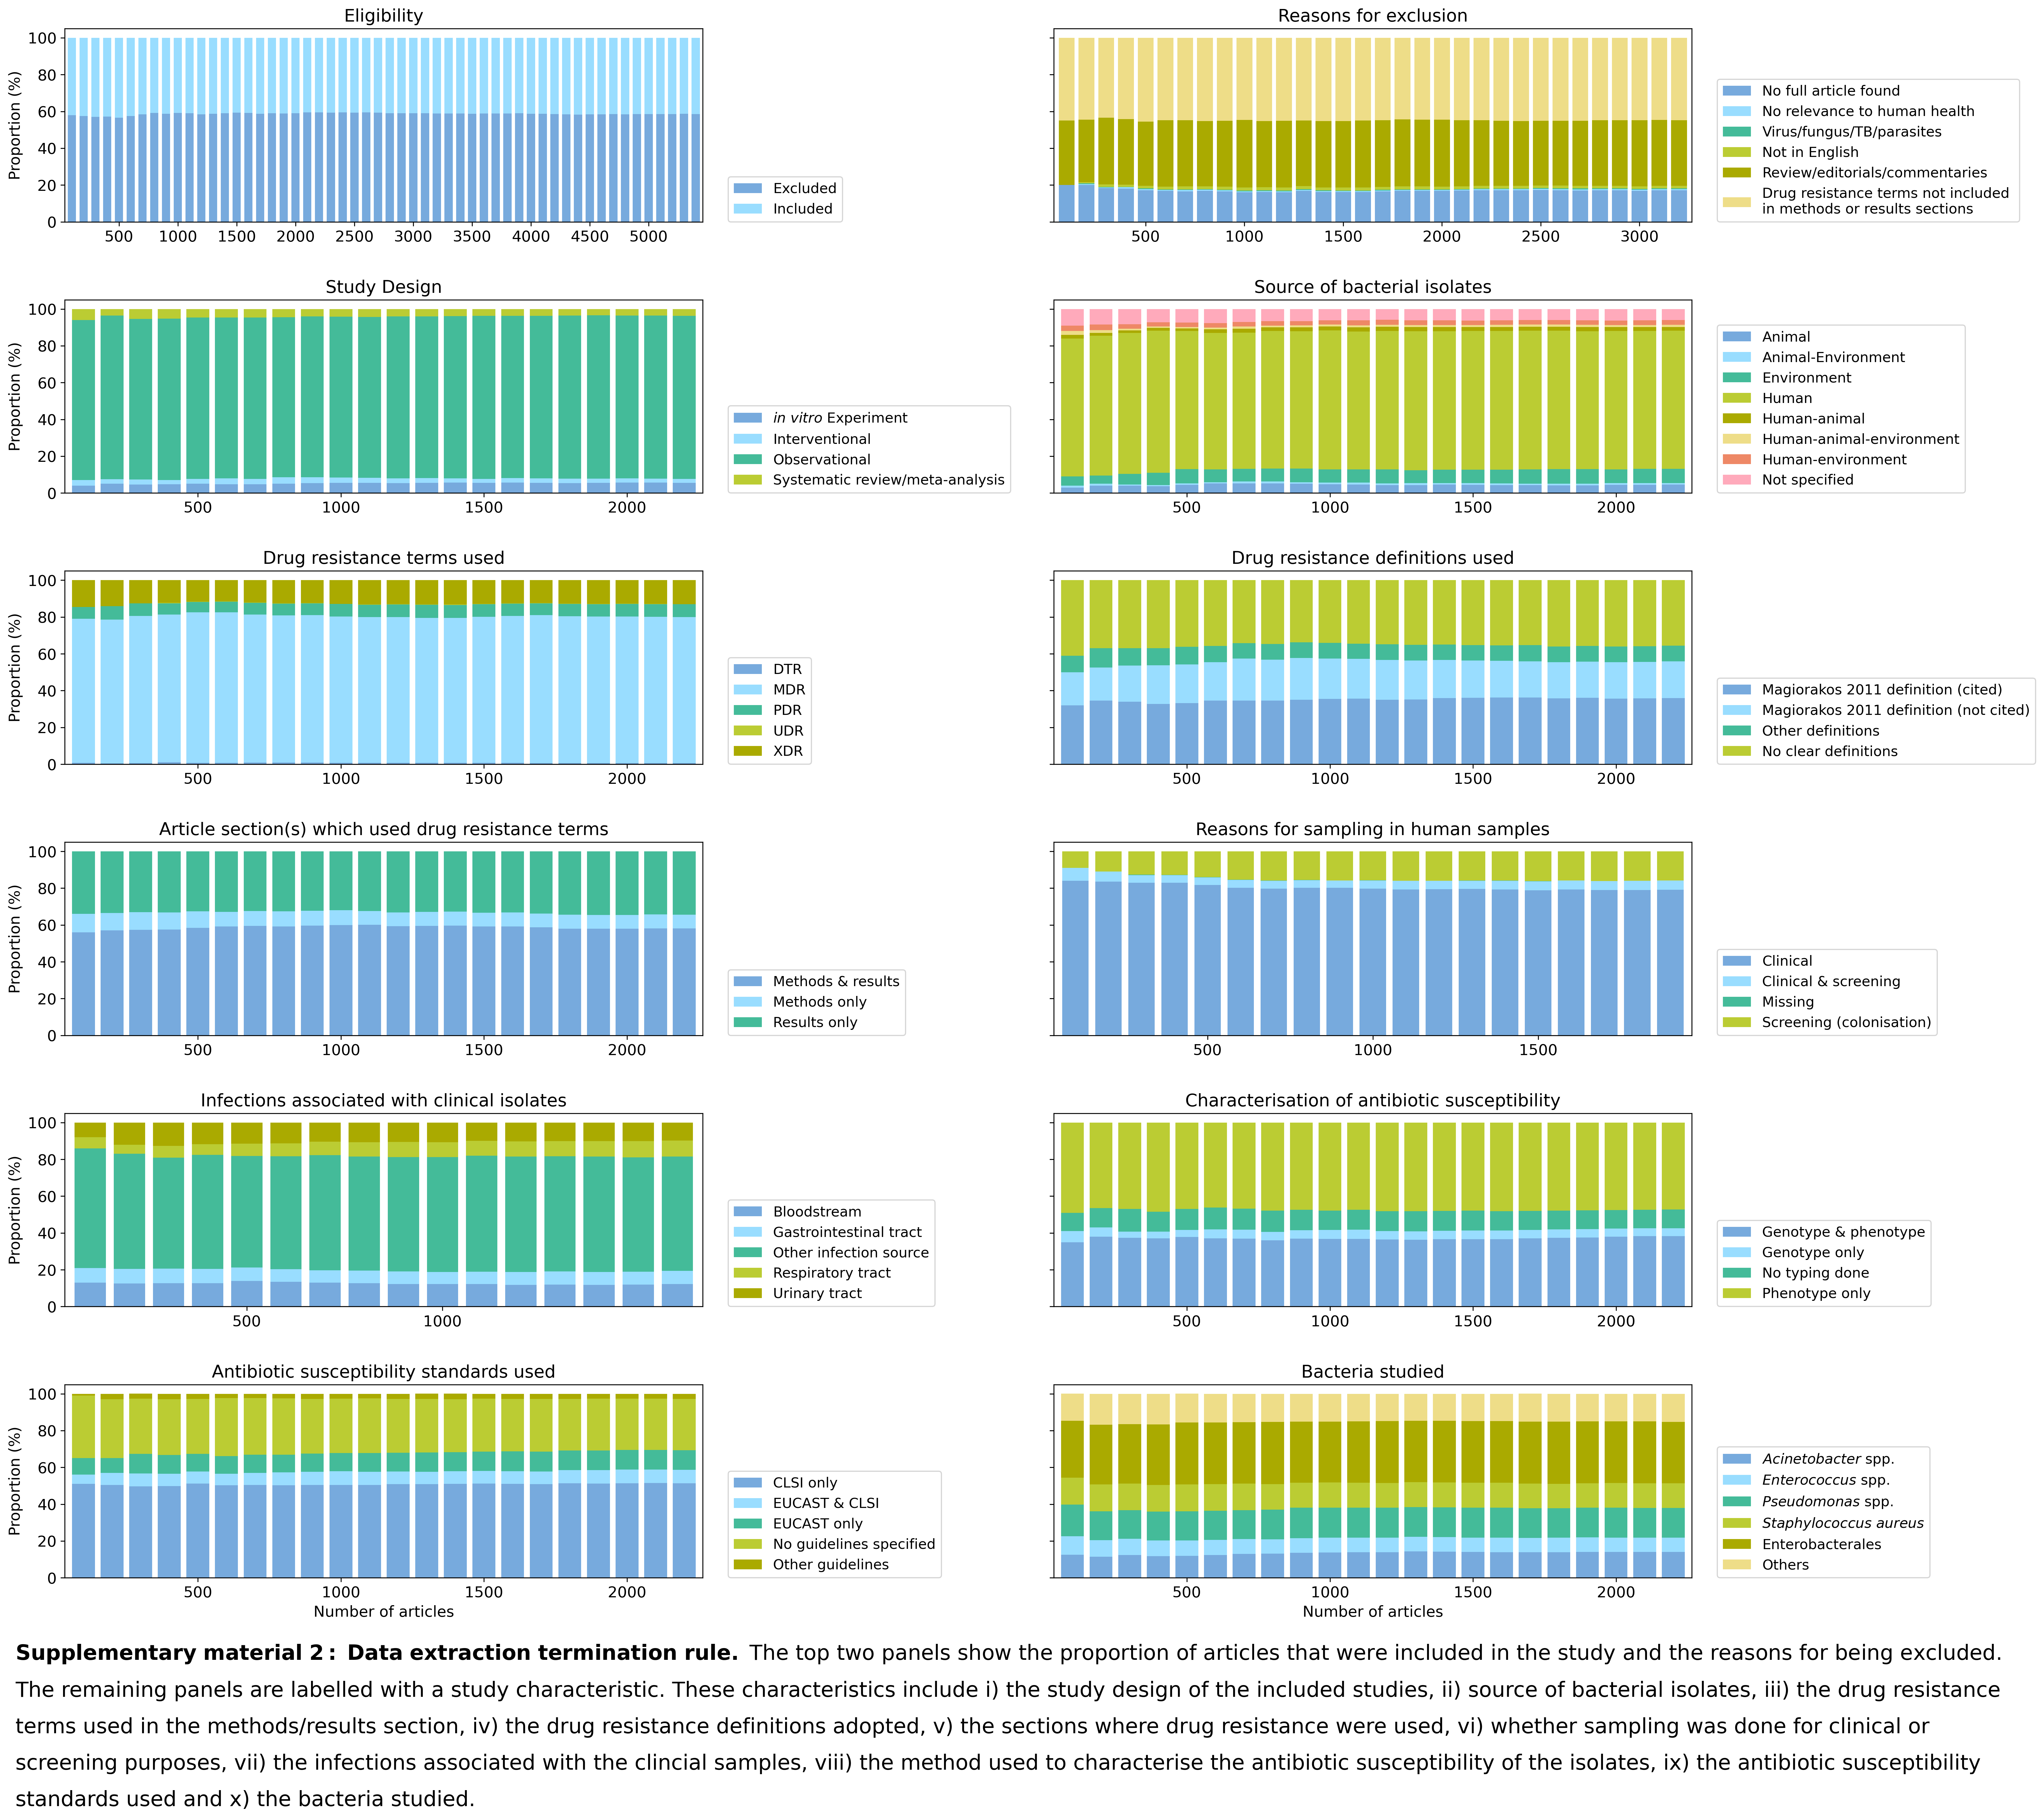

In [34]:
### Summary Trend (All) ###

# sns.set_palette("colorblind")
fig, axes = plt.subplots(6, 2, sharey = True,figsize = (25,20),dpi=300,constrained_layout = True)
data1.plot(ax = axes[0,0],kind='bar', stacked=True, width = 0.7,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data2.plot(ax = axes[0,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data3.plot(ax = axes[1,0],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data4.plot(ax = axes[1,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data5.plot(ax = axes[2,0],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data6.plot(ax = axes[2,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data7.plot(ax = axes[3,0],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data8.plot(ax = axes[3,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data9.plot(ax = axes[4,0],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data10.plot(ax = axes[4,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data11.plot(ax = axes[5,0],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])
data12.plot(ax = axes[5,1],kind='bar', stacked=True, width = 0.8,color=['#77AADD','#99DDFF','#44BB99','#BBCC33','#AAAA00','#EEDD88','#EE8866','#FFAABB'])

axes[0,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[0,1].legend(['No full article found', 'No relevance to human health', 'Virus/fungus/TB/parasites',
                  'Not in English', 'Review/editorials/commentaries','Drug resistance terms not included \nin methods or results sections'],
                 bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[1,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[1,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[2,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[2,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[3,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[3,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[4,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[4,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[5,0].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})
axes[5,1].legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0,prop={'size':12})

axes[0,0].title.set_text('Eligibility')
axes[0,0].title.set_size(15)
axes[0,1].title.set_text('Reasons for exclusion')
axes[0,1].title.set_size(15)
axes[1,0].title.set_text('Study Design')
axes[1,0].title.set_size(15)
axes[1,1].title.set_text('Source of bacterial isolates')
axes[1,1].title.set_size(15)
axes[2,0].title.set_text('Drug resistance terms used')
axes[2,0].title.set_size(15)
axes[2,1].title.set_text('Drug resistance definitions used')
axes[2,1].title.set_size(15)
axes[3,0].title.set_text('Article section(s) which used drug resistance terms')
axes[3,0].title.set_size(15)
axes[3,1].title.set_text('Reasons for sampling in human samples')
axes[3,1].title.set_size(15)
axes[4,0].title.set_text('Infections associated with clinical isolates')
axes[4,0].title.set_size(15)
axes[4,1].title.set_text('Characterisation of antibiotic susceptibility')
axes[4,1].title.set_size(15)
axes[5,0].title.set_text('Antibiotic susceptibility standards used')
axes[5,0].title.set_size(15)
axes[5,1].title.set_text('Bacteria studied')
axes[5,1].title.set_size(15)

axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[0,0].set(xlabel = None, xticks = [4,9,14,19,24,29,34,39,44,49])
axes[0,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[0,0].tick_params(labelsize = 13)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[0,1].set(xlabel = None, xticks = [4,9,14,19, 24,29])
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[1,0].set(xlabel = None, xticks = [4,9,14,19])
axes[1,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[1,0].tick_params(labelsize = 13)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[1,1].set(xlabel = None, xticks = [4,9,14,19])
axes[2,0].set_xticklabels(axes[2,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[2,0].set(xlabel = None, xticks = [4,9,14,19])
axes[2,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[2,0].tick_params(labelsize = 13)
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[2,1].set(xlabel = None, xticks = [4,9,14,19])
axes[3,0].set_xticklabels(axes[3,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[3,0].set(xlabel = None, xticks = [4,9,14,19])
axes[3,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[3,0].tick_params(labelsize = 13)
axes[3,1].set_xticklabels(axes[3,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[3,1].set(xlabel = None, xticks = [4,9,14])
axes[4,0].set_xticklabels(axes[4,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[4,0].set(xlabel = None, xticks = [4,9])
axes[4,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[4,0].tick_params(labelsize = 13)
axes[4,1].set_xticklabels(axes[4,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[4,1].set(xlabel = None, xticks = [4,9,14,19])
axes[5,0].set_xticklabels(axes[5,0].get_xticklabels(),rotation=0, fontsize = 13)
axes[5,0].set(xticks = [4,9,14,19])
axes[5,0].set_ylabel('Proportion (%)', fontsize = 13)
axes[5,0].tick_params(labelsize = 13)
axes[5,0].set_xlabel('Number of articles',fontsize = 13)
axes[5,1].set_xticklabels(axes[5,1].get_xticklabels(),rotation=0, fontsize = 13)
axes[5,1].set(xticks = [4,9,14,19])
axes[5,1].set_xlabel('Number of articles',fontsize = 13)


# Figure caption

t = "$\mathbf{Supplementary}$ $\mathbf{material}$ $\mathbf{2:}$ $\mathbf{Data}$ $\mathbf{extraction}$ $\mathbf{termination}$ $\mathbf{rule.}$ The top two panels show the proportion of articles that were included in the study and the reasons for being excluded. \nThe remaining panels are labelled with a study characteristic. These characteristics include i) the study design of the included studies, ii) source of bacterial isolates, iii) the drug resistance \nterms used in the methods/results section, iv) the drug resistance definitions adopted, v) the sections where drug resistance were used, vi) whether sampling was done for clinical or \nscreening purposes, vii) the infections associated with the clincial samples, viii) the method used to characterise the antibiotic susceptibility of the isolates, ix) the antibiotic susceptibility \nstandards used and x) the bacteria studied."
fig.text(0.02,-0.09,t, fontsize = 18, linespacing = 2)

fig.tight_layout(pad=3.0)
fig.show()
fig.savefig("summary trend (all).png",dpi=300,bbox_inches='tight',facecolor='w')